In [1]:
! pip install gdown
! gdown --id 1x6JencbzMDXXSFDsYeLQr_WqRCUSrdE0
! gdown --id 1ySn3nmYhHPTv7XZejNxl1fYBQL7e4NWe
! unzip -q temp.zip
! unzip -q aiunict-2023.zip

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1x6JencbzMDXXSFDsYeLQr_WqRCUSrdE0
From (redirected): https://drive.google.com/uc?id=1x6JencbzMDXXSFDsYeLQr_WqRCUSrdE0&confirm=t&uuid=8673a3cc-a5e0-4746-a6ca-1ee6f3604739
To: /kaggle/working/temp.zip
100%|██████████████████████████████████████| 45.9M/45.9M [00:00<00:00, 66.0MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1ySn3nmYhHPTv7XZejNxl1fYBQL7e4NWe
From (redirected): https://drive.google.com/uc?id=1ySn3nmYhHPTv7XZejNxl1fYBQL7e4NWe&confirm=t&uuid=8c2bc66c-8b7a-462b-8d87-816b7

In [ ]:
! pip install torchnet
! pip install rembg
! pip install grad-cam

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,x1,y1,x2,y2,class
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,112.336250,123.285000,239.336250,250.285000,3.500000
std,59.321782,54.641764,59.321782,54.641764,2.292004
min,-1.000000,-1.000000,126.000000,126.000000,0.000000
25%,65.000000,77.000000,192.000000,204.000000,1.750000
50%,117.000000,121.000000,244.000000,248.000000,3.500000
75%,155.000000,169.000000,282.000000,296.000000,5.250000
max,220.000000,222.000000,347.000000,349.000000,7.000000


In [3]:
df['x1'] = df['x1'].abs()
df['y1'] = df['y1'].abs()

In [4]:
df.describe()

,x1,y1,x2,y2,class
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,112.338750,123.287500,239.336250,250.285000,3.500000
std,59.317045,54.636119,59.321782,54.641764,2.292004
min,0.000000,0.000000,126.000000,126.000000,0.000000
25%,65.000000,77.000000,192.000000,204.000000,1.750000
50%,117.000000,121.000000,244.000000,248.000000,3.500000
75%,155.000000,169.000000,282.000000,296.000000,5.250000
max,220.000000,222.000000,347.000000,349.000000,7.000000


In [5]:

import cv2
import os 
import matplotlib.pyplot as plt


im_path = os.path.join("train", df["image"][0])
im  = cv2.imread(im_path)
print(im.shape)
cropped_im = im[df["y1"][0]:df["y1"][0]+df["y2"][0],df["x1"][0]:df["x1"][0]+df["x2"][0]]
print(cropped_im.shape)
masked = cv2.rectangle(im.copy(),(df["x1"][0],df["y1"][0]),(df["x2"][0],df["y2"][0]),(255,0,0),thickness=3)


(350, 350, 3)
(206, 206, 3)


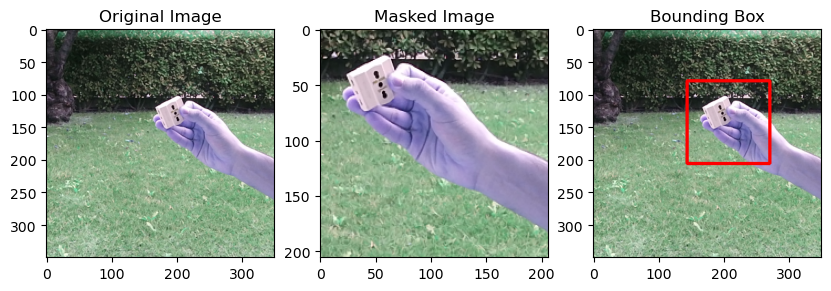

In [6]:
#plot 1:

plt.figure(figsize = (10, 8))
plt.subplot(1, 3, 1)
plt.imshow(im)
plt.title("Original Image")

#plot 2:

plt.subplot(1, 3, 2)
plt.imshow(cropped_im)
plt.title("Masked Image")


#plot 3:

plt.subplot(1, 3, 3)
plt.imshow(masked)
plt.title("Bounding Box")

plt.show()

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 139GB/s]


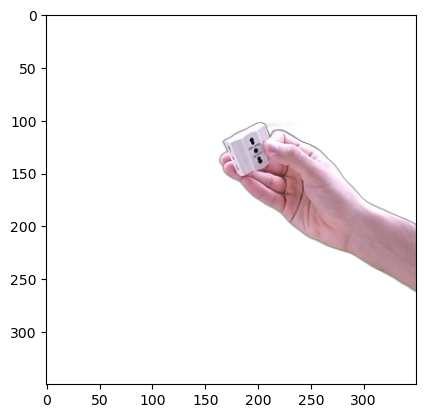

In [8]:
from rembg import remove
from PIL import Image

input = Image.open("train/00/00_000.png")
  
# Removing the background from the given Image
output = remove(input)
  
plt.imshow(output)
plt.show()

In [11]:
# # Create Dataset

# dir = "dataset/"
# os.makedirs(os.path.join(".", 'dataset'), exist_ok=True)
# os.makedirs(os.path.join(dir, 'train'), exist_ok=True)
# os.makedirs(os.path.join(dir, 'val'), exist_ok=True)
# os.makedirs(os.path.join(dir, 'test'), exist_ok=True)





In [12]:
# from PIL import Image
# import numpy as np
# from tqdm import tqdm


# for class_value in tqdm(range(8)):

#   df_train = df.loc[df['class'] == class_value].reset_index(drop=True)
#   for i in range(int(0.8*(len(df_train)))):
#       im_path = (df_train['image'].iloc[i])
#       # im  = cv2.imread(os.path.join("train", im_path))
#       input = Image.open(os.path.join("train", im_path))
#       output = remove(input)
#       im = np.array(output)

#       # print(im.shape)
#       # print(i)
#       cropped_im = im[df_train["y1"][i]:df_train["y1"][i]+df_train["y2"][i]
#                   ,df_train["x1"][i]:df_train["x1"][i]+df_train["x2"][i]]
#       cropped_im = cv2.resize(cropped_im,(224, 224))
#       cropped_im = cropped_im[:,:,::-1]
#       # print(cropped_im.shape)

#       os.makedirs(os.path.join(dir + "train", f'0{class_value}'), exist_ok=True)
#       PIL_image = Image.fromarray(np.uint8(cropped_im))
#       PIL_image.save(f"{dir}/train/0{class_value}/{i}.png")



100%|██████████| 8/8 [1:04:59<00:00, 487.43s/it]


In [13]:

# for class_value in tqdm(range(8)):

#   df_val= df.loc[df['class'] == class_value]
#   df_val = df_val.iloc[-int(0.1*(len(df_val))):].reset_index(drop=True)
#   for i in range(int(len(df_val))):
#       im_path = (df_val['image'].iloc[i])
      
#       # im  = cv2.imread(os.path.join("train", im_path))
#       input = Image.open(os.path.join("train", im_path))
#       output = remove(input)
#       im = np.array(output)

#       # print(im_path)
#       # print(i)
#       cropped_im = im[df_val["y1"][i]:df_val["y1"][i]+df_val["y2"][i]
#                   ,df_val["x1"][i]:df_val["x1"][i]+df_val ["x2"][i]]
#       cropped_im = cv2.resize(cropped_im,(224, 224))
#       cropped_im = cropped_im[:,:,::-1]
#       # print(cropped_im.shape)

#       os.makedirs(os.path.join(dir + "val", f'0{class_value}'), exist_ok=True)
#       PIL_image = Image.fromarray(np.uint8(cropped_im))
#       PIL_image.save(f"{dir}/val/0{class_value}/{i}.png")



100%|██████████| 8/8 [08:08<00:00, 61.04s/it]


In [14]:


# for class_value in tqdm(range(8)):

#   df_test= df.loc[df['class'] == class_value]
#   df_test = df_test.iloc[int(0.8*(len(df_test))):-int(0.1*(len(df_test)))].reset_index(drop=True)

#   for i in range(int(len(df_test))):
#       im_path = (df_test['image'].iloc[i])
#       # im  = cv2.imread(os.path.join("train", im_path))
#       input = Image.open(os.path.join("train", im_path))
#       output = remove(input)
#       im = np.array(output)
#       # print(im_path)
#       # print(i)
#       cropped_im = im[df_test["y1"][i]:df_test["y1"][i]+df_test["y2"][i]
#                   ,df_test["x1"][i]:df_test["x1"][i]+df_test ["x2"][i]]
#       cropped_im = cv2.resize(cropped_im,(224, 224))
#       cropped_im = cropped_im[:,:,::-1]
#       # print(cropped_im.shape)

#       os.makedirs(os.path.join(dir + "test", f'0{class_value}'), exist_ok=True)
#       PIL_image = Image.fromarray(np.uint8(cropped_im))
#       PIL_image.save(f"{dir}/test/0{class_value}/{i}.png")


100%|██████████| 8/8 [08:00<00:00, 60.02s/it]


In [15]:
# ! zip -r temp.zip dataset/ 

  adding: dataset/ (stored 0%)

  adding: dataset/val/ (stored 0%)

  adding: dataset/val/05/ (stored 0%)

  adding: dataset/val/05/1.png (deflated 4%)

  adding: dataset/val/05/11.png (deflated 1%)

  adding: dataset/val/05/5.png (deflated 0%)

  adding: dataset/val/05/17.png (deflated 2%)

  adding: dataset/val/05/0.png (deflated 1%)

  adding: dataset/val/05/18.png (deflated 3%)

  adding: dataset/val/05/15.png (deflated 0%)

  adding: dataset/val/05/6.png (deflated 0%)

  adding: dataset/val/05/9.png (deflated 0%)

  adding: dataset/val/05/3.png (deflated 2%)

  adding: dataset/val/05/16.png (deflated 0%)

  adding: dataset/val/05/12.png (deflated 1%)

  adding: dataset/val/05/8.png (deflated 0%)

  adding: dataset/val/05/10.png (deflated 1%)

  adding: dataset/val/05/19.png (deflated 0%)

  adding: dataset/val/05/2.png (deflated 3%)

  adding: dataset/val/05/4.png (deflated 2%)

  adding: dataset/val/05/13.png (deflated 2%)

  adding: dataset/val/05/7.png (deflated 2%)

  adding: 

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import seaborn as sn
import pandas as pd
# import torchnet.meter.confusionmeter as cm

# Data augmentation and normalization for training
# Just normalization for validation & test
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

data_dir = 'dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#lists for graph generation
epoch_counter_train = []
epoch_counter_val = []
train_loss = []
val_loss = []
train_acc = []
val_acc = []

#Train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch +1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            #For graph generation
            if phase == "train":
                train_loss.append(running_loss/dataset_sizes[phase])
                train_acc.append(running_corrects.double() / dataset_sizes[phase])
                epoch_counter_train.append(epoch)
            if phase == "val":
                val_loss.append(running_loss/ dataset_sizes[phase])
                val_acc.append(running_corrects.double() / dataset_sizes[phase])
                epoch_counter_val.append(epoch)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            #for printing        
            if phase == "train":    
                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]
            if phase == "val":    
                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the best model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [10]:
#Using a model pre-trained on ImageNet and replacing it's final linear layer

#For resnet18
model_ft = models.efficientnet_b0(pretrained=True)
# num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(1280, 8)


model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Using Adam as the parameter optimizer
optimizer_ft = optim.Adam(model_ft.parameters(), lr = 0.0001, betas=(0.9, 0.999))

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)       


model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=50)        




/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 84.1MB/s]


Epoch 1/50
----------


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 3.9054 Acc: 0.3039
val Loss: 1.6304 Acc: 0.5500

Epoch 2/50
----------
train Loss: 1.0791 Acc: 0.6992
val Loss: 0.6612 Acc: 0.8063

Epoch 3/50
----------
train Loss: 0.7078 Acc: 0.7656
val Loss: 0.3831 Acc: 0.8813

Epoch 4/50
----------
train Loss: 0.5565 Acc: 0.8242
val Loss: 0.3311 Acc: 0.9000

Epoch 5/50
----------
train Loss: 0.5432 Acc: 0.8266
val Loss: 0.2377 Acc: 0.9250

Epoch 6/50
----------
train Loss: 0.4630 Acc: 0.8438
val Loss: 0.1871 Acc: 0.9563

Epoch 7/50
----------
train Loss: 0.4290 Acc: 0.8656
val Loss: 0.1694 Acc: 0.9438

Epoch 8/50
----------
train Loss: 0.4369 Acc: 0.8516
val Loss: 0.1638 Acc: 0.9563

Epoch 9/50
----------
train Loss: 0.4722 Acc: 0.8281
val Loss: 0.1587 Acc: 0.9625

Epoch 10/50
----------
train Loss: 0.3821 Acc: 0.8727
val Loss: 0.1571 Acc: 0.9625

Epoch 11/50
----------
train Loss: 0.4442 Acc: 0.8523
val Loss: 0.1553 Acc: 0.9625

Epoch 12/50
----------
train Loss: 0.4209 Acc: 0.8547
val Loss: 0.1452 Acc: 0.9563

Epoch 13/50
----------


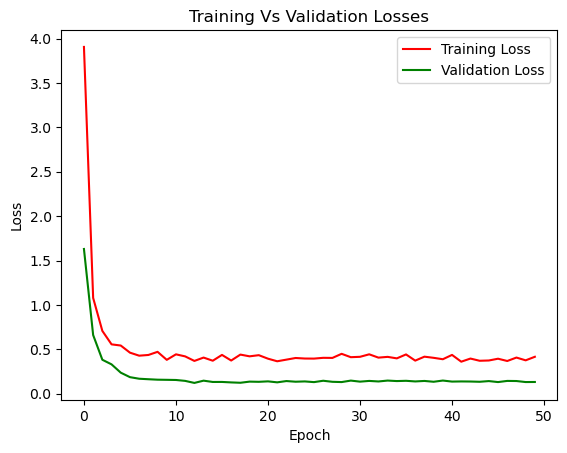

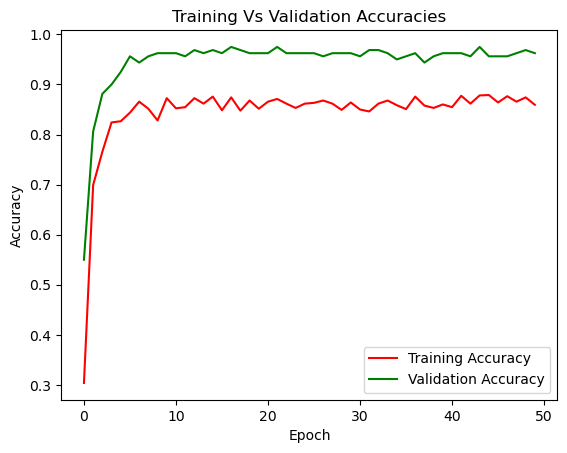

In [11]:
#Plot the train & validation losses
plt.figure()
plt.title("Training Vs Validation Losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epoch_counter_train,train_loss,color = 'r', label="Training Loss")
plt.plot(epoch_counter_val,val_loss,color = 'g', label="Validation Loss")
plt.legend()
plt.show()

tacc = [item.cpu().numpy() for item in train_acc]
vacc = [item.cpu().numpy() for item in val_acc]

#Plot the accuracies in train & validation
plt.figure()
plt.title("Training Vs Validation Accuracies")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epoch_counter_train,tacc,color = 'r', label="Training Accuracy")
plt.plot(epoch_counter_val,vacc,color = 'g', label="Validation Accuracy")
plt.legend()
plt.show()


Accuracy of the network on the test images: 96 %
Accuracy of    00 : 100 %
Accuracy of    01 : 90 %
Accuracy of    02 : 100 %
Accuracy of    03 : 95 %
Accuracy of    04 : 100 %
Accuracy of    05 : 90 %
Accuracy of    06 : 100 %
Accuracy of    07 : 100 %
[[20  0  0  0  0  0  0  0]
 [ 0 18  1  1  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  1]
 [ 0  0  0  0 20  0  0  0]
 [ 0  1  1  0  0 18  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 20]]


<Axes: >

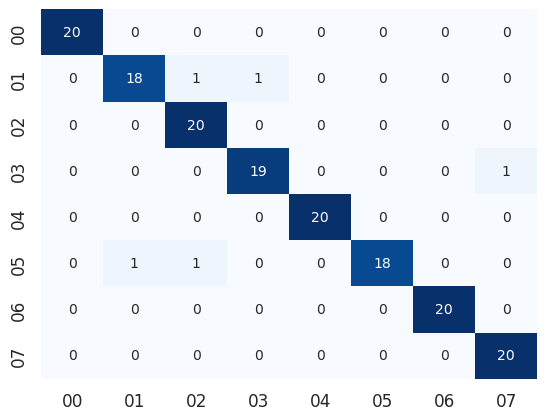

In [13]:
import torchnet.meter.confusionmeter as cm

#Test the accuracy with test data
correct = 0
total = 0
with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model_ft(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

#Class wise testing accuracy
class_correct = list(0. for i in range(8))
class_total = list(0. for i in range(8))
with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model_ft(inputs)
            _, predicted = torch.max(outputs, 1)
            point = (predicted == labels).squeeze()
            for j in range(len(labels)):
                label = labels[j]
                class_correct[label] += point[j].item()
                class_total[label] += 1

for i in range(8):
    print('Accuracy of %5s : %2d %%' % (
        class_names[i], 100 * class_correct[i] / class_total[i]))


#Get the confusion matrix for testing data
confusion_matrix = cm.ConfusionMeter(8)
with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        confusion_matrix.add(predicted, labels)
    print(confusion_matrix.conf)

#Confusion matrix as a heatmap
con_m = confusion_matrix.conf
df_con_m = pd.DataFrame(con_m, index= [i for i in class_names], columns = [i for i in class_names])
sn.set(font_scale= 1.1)
sn.heatmap(df_con_m, annot=True,fmt='g' ,  annot_kws={"size" : 10}, cbar = False, cmap="Blues") 


In [18]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import torch
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform):
        self.dataframe = dataframe
        self.transform = transform

    def __getitem__(self, index):
        im_path = os.path.join("test", self.dataframe["image"][index])
        image = Image.open(im_path)
        output = remove(image)
        array = np.array(output)
        cropped_im = array[self.dataframe["y1"][index]:self.dataframe["y1"][index]+self.dataframe["y2"][index]
                    ,self.dataframe["x1"][index]:self.dataframe["x1"][index]+self.dataframe["x2"][index]]
        
        # cropped_im = cropped_im[:,:,::-1]
        PIL_image = Image.fromarray(np.uint8(cropped_im)).convert('RGB')
        image = data_transforms(PIL_image)
        return image

    def __len__(self):
        return len(self.dataframe)

data_transforms = transforms.Compose([
                  transforms.Resize((224,224)),
                  transforms.ToTensor(),
                  transforms.CenterCrop(224),
                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                  ])


df_pred = pd.read_csv("test.csv")

data_test = CustomDataset(dataframe=df_pred, transform = data_transforms)
test_dataloader = DataLoader(data_test)



In [20]:
from rembg import remove
from tqdm import tqdm 


preds =[]
with torch.no_grad():
    for i, (inputs) in tqdm(enumerate(test_dataloader)):
            inputs = inputs.to(device)
            outputs = model_ft(inputs)
            _, predicted = torch.max(outputs.data, 1)
            preds.append(predicted)


800it [31:23,  2.35s/it]


In [21]:
len(preds)

800

In [23]:
final = [item.cpu().numpy()[0] for item in preds]

In [24]:
np.unique(final)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [25]:
torch.save(model_ft.state_dict(), "eff_wb.pth")

In [26]:
submission = pd.DataFrame({'image' : df_pred.iloc[:,0], 'class': final})
submission.to_csv('submission.csv', index = False)

In [39]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50



index = 100
target_layers = [model_ft.features[-1][0]]

image = Image.open(os.path.join("test", df_pred["image"][index]))
output = remove(image)
array = np.array(output)
cropped_im = array[df_pred["y1"][index]:df_pred["y1"][index]+df_pred["y2"][index]
          ,df_pred["x1"][index]:df_pred["x1"][index]+df_pred["x2"][index]]

# cropped_im = cropped_im[:,:,::-1]
PIL_image = Image.fromarray(np.uint8(cropped_im)).convert('RGB')
array = data_transforms(PIL_image)
array = torch.unsqueeze(array, 0)

input_tensor = array
# Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model_ft, target_layers=target_layers, use_cuda=True)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

targets = [ClassifierOutputTarget(281)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]



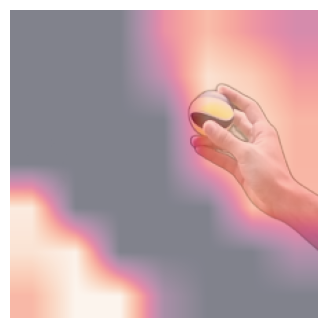

In [43]:

plt.figure(figsize = (4, 4))
plt.axis('off')
plt.imshow(output)
plt.imshow(grayscale_cam, alpha=0.5)
